# Question 1

In [3]:
import cv2
import numpy as np

image = cv2.imread('Face.jpg')

cv2.imshow('Original Image', image)
cv2.waitKey(0)

# Making a sqare
cv2.rectangle(image, (300, 50), (650, 500), 100, -1)
cv2.imshow("Square", image)
cv2.waitKey(0)

cv2.destroyAllWindows()

# Question 2

In [4]:
import cv2
import numpy as np

image = cv2.imread('Face.jpg')

cv2.imshow('Original Image', image)
cv2.waitKey(0)

# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9

# We use the cv2.fitler2D to conovlve the kernal with an image 
blurred = cv2.filter2D(image, -1, kernel_3x3)
cv2.imshow('3x3 Kernel Blurring', blurred)
cv2.waitKey(0)

# Creating our 7 x 7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)
cv2.imshow('7x7 Kernel Blurring', blurred2)
cv2.waitKey(0)


-1

# Question 3

In [6]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dropout, Activation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [7]:
mnist_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mnist_train.csv')
mnist_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mnist_test.csv')

In [8]:
Data_train = mnist_train.to_numpy()
Data_test = mnist_test.to_numpy()

y_train = Data_train[:, 0]
x_train = Data_train[:, 1:]

x_test = Data_test[:, 1:]
y_test = Data_test[:, 0]

In [9]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [10]:
print(type(x_train))
print(type(y_train))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
"""
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print(x_train.shape)
print(x_test.shape)
"""

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
x_val = x_train[48000:60000]
x_train = x_train[:48000]
y_val = y_train[48000:60000]
y_train = y_train[:48000]

print(x_val.shape)
print(x_train.shape)
print(y_val.shape)
print(y_train.shape)

(12000, 784)
(48000, 784)
(12000, 10)
(48000, 10)


In [13]:

model = Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=784))
model.add(Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
"""
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
"""


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [16]:
history = model.fit(x_train, y_train,
          epochs=40, batch_size=256, validation_data=(x_val, y_val))

Epoch 1/40
188/188 [==============================] - 1s 4ms/step - loss: 0.7367 - accuracy: 0.7821 - val_loss: 0.3073 - val_accuracy: 0.9141
Epoch 2/40
188/188 [==============================] - 1s 3ms/step - loss: 0.3626 - accuracy: 0.8953 - val_loss: 0.2330 - val_accuracy: 0.9351
Epoch 3/40
188/188 [==============================] - 1s 3ms/step - loss: 0.2933 - accuracy: 0.9150 - val_loss: 0.1967 - val_accuracy: 0.9458
Epoch 4/40
188/188 [==============================] - 1s 3ms/step - loss: 0.2535 - accuracy: 0.9279 - val_loss: 0.1728 - val_accuracy: 0.9520
Epoch 5/40
188/188 [==============================] - 1s 3ms/step - loss: 0.2258 - accuracy: 0.9339 - val_loss: 0.1591 - val_accuracy: 0.9551
Epoch 6/40
188/188 [==============================] - 1s 3ms/step - loss: 0.2058 - accuracy: 0.9407 - val_loss: 0.1483 - val_accuracy: 0.9581
Epoch 7/40
188/188 [==============================] - 1s 3ms/step - loss: 0.1927 - accuracy: 0.9442 - val_loss: 0.1366 - val_accuracy: 0.9612
Epoch 

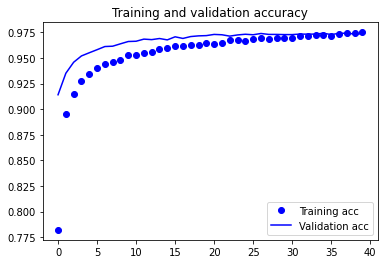

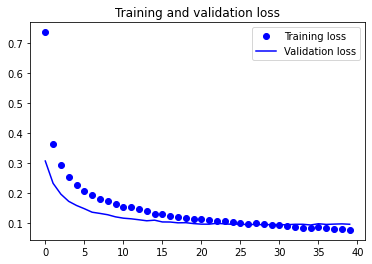

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
predicted_classes = model.predict_classes(x_test)
print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
predicted:
[7 2 1 ... 4 5 6]
True Label:
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0936 - accuracy: 0.9723

Testing loss: 0.09, acc: 0.97%
